# Приоритизация гипотез и анализ результатов A/B теста
## Задачи:
1. Приоритизировать гипотезы для увеличения выручки крупного интернет-магазина из подготовленного с отделом маркетинга списка.
2. Запустить A/B-тест.
3. Проанализировать результаты.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
dataa = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
display(dataa)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
dataa['ICE'] = (dataa['Impact'] * dataa['Confidence']) / dataa['Efforts']

In [5]:
data_sort = dataa.sort_values(by='ICE',ascending=False)

In [6]:
dataa['RICE'] = (dataa['Reach'] * dataa['Impact'] * dataa['Confidence']) / dataa['Efforts']

In [7]:
data_sort2 = dataa.sort_values(by='RICE',ascending=False)

In [8]:

display(data_sort[['Hypothesis', 'ICE']])
display(data_sort2[['Hypothesis', 'RICE']])

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Вывод: различие между ICE и RICE состоит в том , что RICE учитывает скольких пользователей затронет изменение. Из за этого гипотезы "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов","Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" выше оценивается в параметре RICE, а гипотезы "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" стоят ниже чем так как оценка охвата меньше!

# Анализ A/B-теста

In [9]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')


visitors = pd.read_csv('/datasets/visitors.csv', sep=',')


print(orders.head(5))
print(visitors.head(5))




   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
visitors.duplicated().sum()

0

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


# 1 график кумулятивной выручки по группам

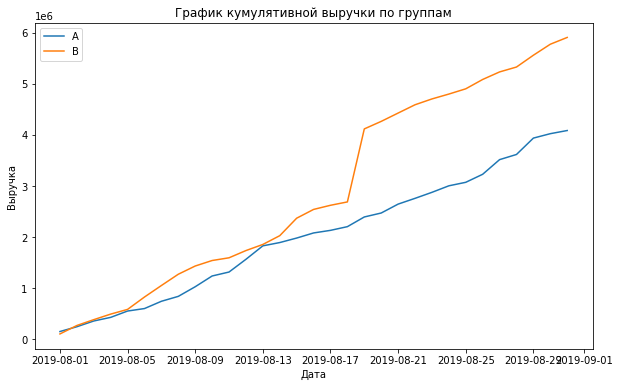

In [17]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


cumulativeRevenueA['date'] = pd.to_datetime(cumulativeRevenueA['date'], format='%Y-%m-%d')
cumulativeRevenueB['date'] = pd.to_datetime(cumulativeRevenueB['date'], format='%Y-%m-%d')

plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.show()

Выручка увеличивается в течение всего теста, но график выручки группы B в одной точке резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

# 2 график кумулятивного среднего чека по группам

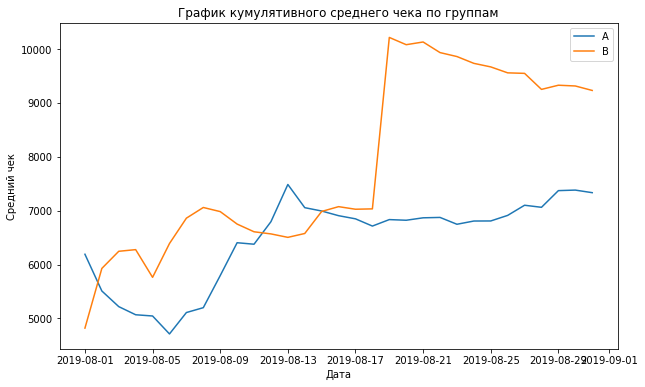

In [18]:
plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show()

Есть резкие скачки у обеих групп, но средний чек группы В резко возрос в опреденный день, что может значить о крупной покупки.

# 3 график относительного изменения кумулятивного среднего чека группы B к группе A

In [19]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,left_on='date',right_on='date',how='left',suffixes=['A', 'B'])

In [20]:
mergedCumulativeRevenue.head(5)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


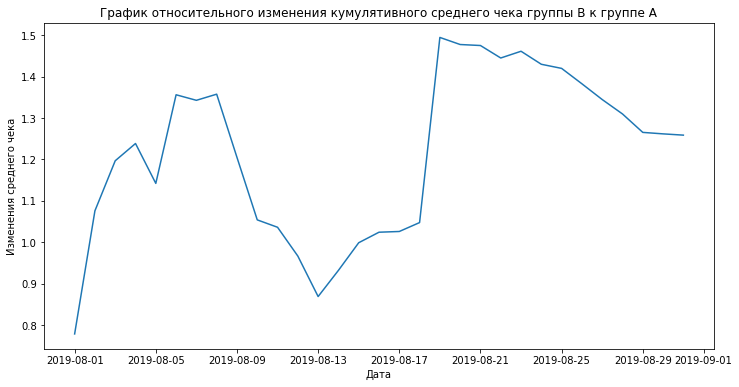

In [21]:
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) )
plt.xlabel('Дата')
plt.ylabel('Изменения среднего чека')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

График различия между сегментами резко «скачет». Сначала средний чек группы B стабильно растет, потом резко падает и резко взлетает. Возможно это влияние крупных заказов и выбросов. 

# 4 график кумулятивного среднего количества заказов на посетителя по группам

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [23]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

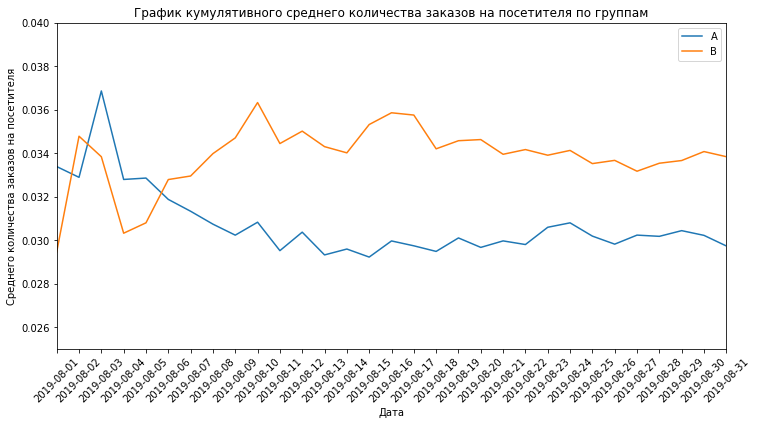

In [24]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Cреднего количества заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=45)
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.040])
plt.show()

Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

# 5 график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

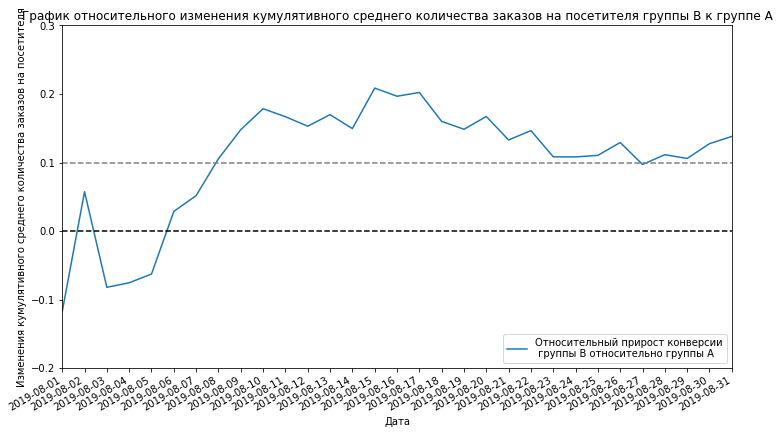

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=[12,7])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии\n группы B относительно группы A")
plt.legend(loc="lower right")
fig.autofmt_xdate()
plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивного среднего количества заказов на посетителя')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3])

plt.show()


В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Конверсия группы B стабильно выше. Стоит проанализировать аномалии, возможно результаты изменятся.

# 6 точечный график количества заказов по пользователям

In [26]:
orders_by_user = (orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'}))
orders_by_user.columns = ['user_id','orders']
orders_by_user.head(5)

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


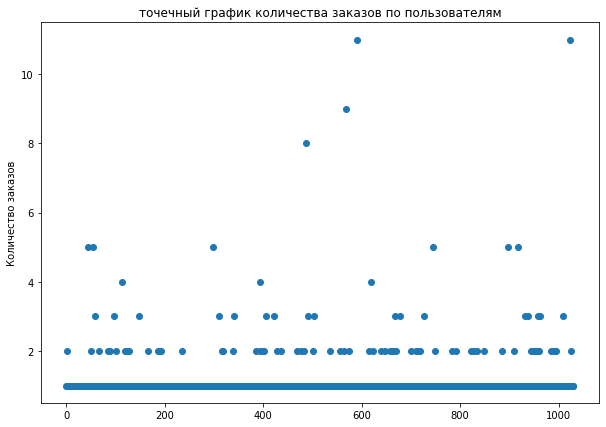

In [27]:
x_values = pd.Series(range(0,len(orders_by_user)))
plt.figure(figsize=(10,7))
plt.scatter(x_values, orders_by_user['orders']) 
plt.ylabel('Количество заказов')
plt.title('точечный график количества заказов по пользователям')
plt.show()

Большинство заказывает один или два раза, бывает количесво заказов больше 3 или 4. Ну и единичные случаи котрые заказывают больше 5 раз.

# 7 95-й и 99-й перцентили количества заказов на пользователя

In [28]:
print(np.percentile(orders_by_user['orders'], [95, 99]))

[2. 4.]


5% сделали больше 2 заказов и 1% больше 4

# 8 точечный график стоимостей заказов

In [29]:
revenue_by_user = (orders.groupby('visitorId', as_index=False).agg({'revenue':'sum'}))
revenue_by_user.columns = ['user_id','revenue']
revenue_by_user.head(5)

,user_id,revenue
0,5114589,570
1,6958315,1490
2,8300375,12300
3,11685486,6201
4,39475350,3990


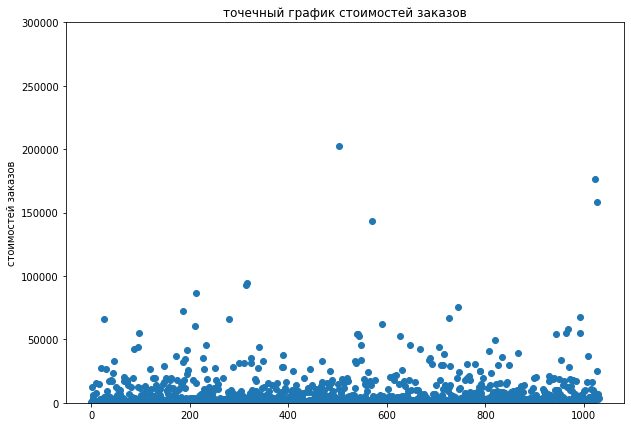

In [30]:
x_values = pd.Series(range(0,len(revenue_by_user)))
plt.figure(figsize=(10,7))
plt.scatter(x_values, revenue_by_user['revenue']) 
plt.ylabel('стоимостей заказов')
plt.title('точечный график стоимостей заказов')
plt.ylim([0, 300000])
plt.show()

Практически все заказы не превышают 100000, но есть один выброс где зазаз вышел на сумму более 1,2 млн. Он может сильно искозить данные, и помешать найти верный результат.

# 9 95-й и 99-й перцентили стоимости заказов

In [31]:
print(np.percentile(revenue_by_user['revenue'], [95, 99]))

[32899.5 67750. ]


Не больше чем 5% совершили заказ на сумму более 32899 и не более 1% сделали заказ на сумму более 67750.
Будем считать, что выше 35000 заказы будут считаться аномальными.

# 10 Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [34]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [35]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01679
0.138


P-value значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. 
Альтернативная гипотеза - статистически значимых различий в конверсии между группами имеются

# 11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [36]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Нулевая гипотеза - В среднем чеке заказа между группами различий нет.
Альтернативная гипотеза - В среднем чеке заказа между группами различия есть

P-value больше 0.05. Значит, нельзя отвегнуть нулевую гипотезу.— статистически значимых отличий в среднем чеке между группами нет. Поскольку относительное различие среднего чека между сегментами составляет ~26%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

# 12  Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [37]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(len(abnormalUsers))

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
dtype: int64
53


53 аномальных пользователя.Надо выяснить как они повляили на предыдущие измерения

In [38]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.010
0.179


P-value все также ментше 0.05 что значит мы можем отвергнуть нулевую гипотезу о том , что статистически значимых различий в конверсии между группами нет.
Относительный прирост конверсии группы B около 18%

# 13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [39]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.885
0.022


P-value осталась больше 0.05, следовательно статистически значимых отличий в среднем чеке между группами нет. 
Различий между группами стало меньше  и можно сказать что его практически нет.

# 14 решение по результатам теста

На основании результатов, можно остановить тест и зафиксировать победу группы B. Так как есть статистически значимое различие по конверсии между группами, относительный прирост конверсии группы B около 17%.

Вывод: Провели анализ данных по двум группам. В начале сделали предобработку данных, где выявили что у нас нет пропусков и нет дубликатов в исследуемых данных. Рассмотрели графики различия среднего чека по группам,количество заказов относительно двух групп и среднйи чек. Выявили аномальные значения, которые могли помешать нам сделатб правльный вывод по работе. Сравнили данные с аномальными значениями и без них, и выявили гипотезы относительно наших показателей. 

Остановить тест будет правильным решением, так как прирост конверсии группы В около 17%, и дальнейшее исследования будет не таким эффективным и лишние затраты на него плохо повляиют на бюджет.